___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [29]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
from datetime import datetime
# Print every output from a cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Define timespan.
start = datetime(2006, 1, 1)
end = datetime(2016, 1, 1)

In [5]:
# Use stooq as data source.

# Bank of America.
BAC = data.DataReader("BAC", 'stooq', start, end)
BAC.head(1)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)
C.head(1)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)
GS.head(1)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)
JPM.head(1)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)
MS.head(1)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)
WFC.head(1)

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,15.199,15.251,15.036,15.036,52684386.0


,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,45.121,45.397,44.843,44.843,13007619.0


,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,164.26,165.83,163.24,163.41,1955875.0


,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,56.096,56.593,55.933,55.962,17289651.0


,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,27.539,27.878,27.419,27.456,9441652


,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,45.5,45.865,45.254,45.374,13094138.0


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
tickers = 'BAC C GS JPM MS WFC'.split()
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [7]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)
bank_stocks.head()

BAC                                           C          \
              Open    High     Low   Close      Volume    Open    High   
Date                                                                     
2006-01-03  40.601  40.823  39.934  40.739  18832700.0  421.80  425.04   
2006-01-04  40.671  40.881  40.194  40.306  20521415.0  420.61  422.66   
2006-01-05  40.306  40.524  40.083  40.359  17129894.0  416.96  419.89   
2006-01-06  40.496  40.591  40.109  40.297  14554711.0  420.77  420.91   
2006-01-09  40.428  40.645  40.116  40.324  18050003.0  418.34  419.54   

                                       ...      MS                          \
               Low   Close     Volume  ...    Open    High     Low   Close   
Date                                   ...                                   
2006-01-03  414.12  424.29  1786289.0  ...  38.813  39.706  38.516  39.582   
2006-01-04  416.17  416.44  2173546.0  ...  39.852  40.246  39.614  39.614   
2006-01-05  416.62  418.49  1318875.0  ...  39.614  39.778  39.384  39.722   
2006-01-06  414.90  418.49  1591822.0  ...  39.899  39.950  39.410  39.762   
2006-01-09  415.75  416.53  1952580.0  ...  39.800  40.253  39.793  40.178   

                          WFC                                      
               Volume    Open    High     Low   Close      Volume  
Date                                                               
2006-01-03  6575019.0  23.277  23.555  22.983  23.497  14956046.0  
2006-01-04  9755289.0  23.421  23.436  23.098  23.225  14757294.0  
2006-01-05  7065367.0  23.202  23.239  23.060  23.202  13754283.0  
2006-01-06  8424875.0  23.264  23.402  23.122  23.333  11409137.0  
2006-01-09  5067910.0  23.333  23.436  23.239  23.333   7629265.0  

[5 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [9]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.601  40.823  39.934  40.739  18832700.0  421.80  425.04   
2006-01-04   40.671  40.881  40.194  40.306  20521415.0  420.61  422.66   
2006-01-05   40.306  40.524  40.083  40.359  17129894.0  416.96  419.89   
2006-01-06   40.496  40.591  40.109  40.297  14554711.0  420.77  420.91   
2006-01-09   40.428  40.645  40.116  40.324  18050003.0  418.34  419.54   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   414.12  424.29  1786289.0  ...  38.813  39.706  38.516  39.582   
2006-01-04   416.17  416.44  2173546.0  ...  39.852  40.246  39.614  39.614   
2006-01-05   416.62  418.49  1318875.0  ...  39.614  39.778  39.384  39.722   
2006-01-06   414.90  418.49  1591822.0  ...  39.899  39.950  39.410  39.762   
2006-01-09   415.75  416.53  1952580.0  ...  39.800  40.253  39.793  40.178   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6575019.0  23.277  23.555  22.983  23.497  14956046.0  
2006-01-04   9755289.0  23.421  23.436  23.098  23.225  14757294.0  
2006-01-05   7065367.0  23.202  23.239  23.060  23.202  13754283.0  
2006-01-06   8424875.0  23.264  23.402  23.122  23.333  11409137.0  
2006-01-09   5067910.0  23.333  23.436  23.239  23.333   7629265.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [10]:
# bank_stocks.info()

In [11]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     47.505
C      485.570
GS     210.170
JPM     58.967
MS      60.624
WFC     48.198
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [12]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [13]:
# for t in tickers:
#     returns['{} Return'.format(t)] = bank_stocks.xs('Close',axis=1,level=1,drop_level=True)[t].pct_change()
    
for t in tickers:
    returns[t + ' Return'] = bank_stocks[t]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010629,-0.018501,-0.013638,-0.014285,0.000808,-0.011576
2006-01-05,0.001315,0.004923,-0.000371,0.003088,0.002726,-0.000990
2006-01-06,-0.001536,0.000000,0.013925,0.007071,0.001007,0.005646
2006-01-09,0.000670,-0.004684,0.011994,0.016227,0.010462,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

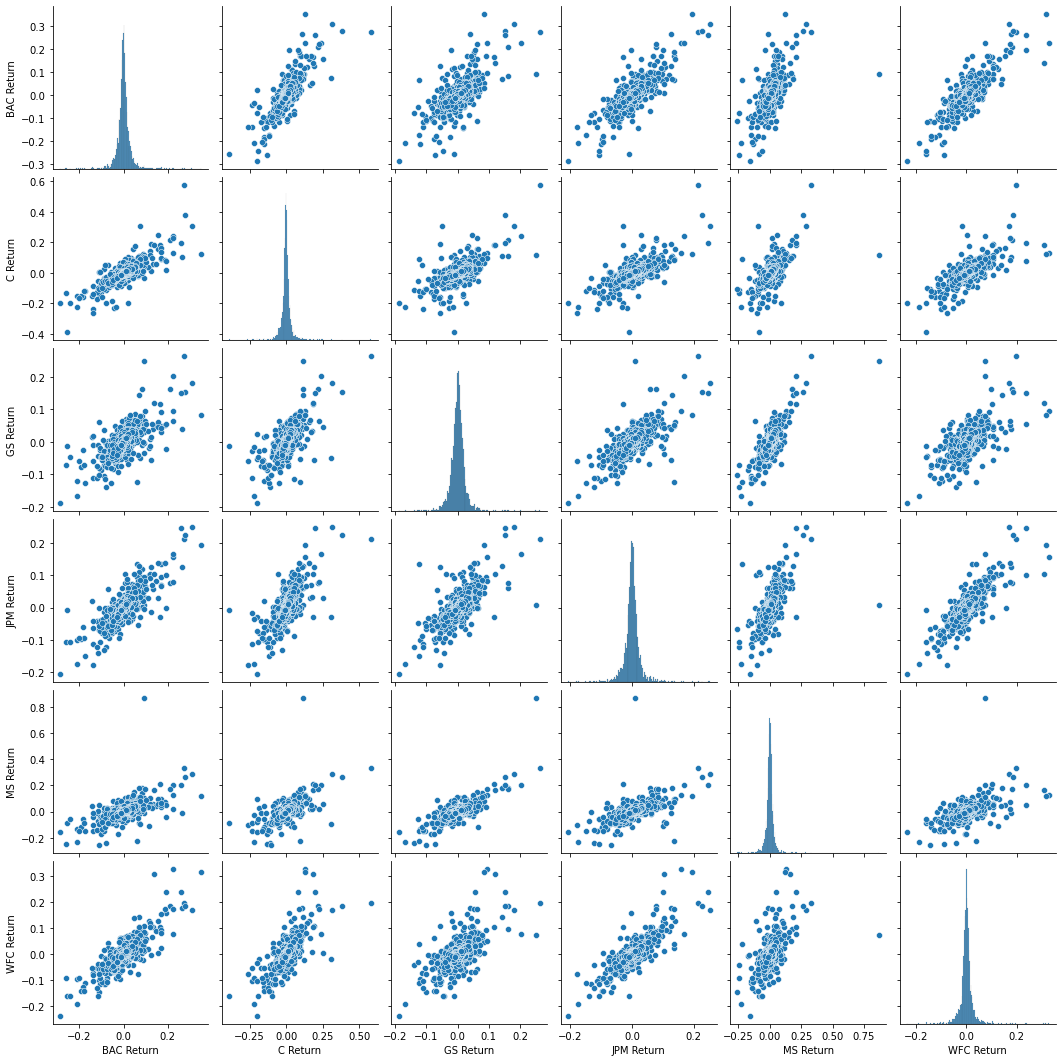

In [14]:
import seaborn as sns
sns.pairplot(returns,palette='coolwarm')

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [15]:
returns.idxmin()
returns.idxmax()
# Inauguration Day.

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [16]:
returns.std()
# C has the largest std for returns, thus, is the riskiest.

BAC Return    0.036605
C Return      0.038616
GS Return     0.025369
JPM Return    0.027669
MS Return     0.037706
WFC Return    0.030220
dtype: float64

In [17]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016149
C Return      0.015280
GS Return     0.014027
JPM Return    0.013965
MS Return     0.016007
WFC Return    0.012546
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

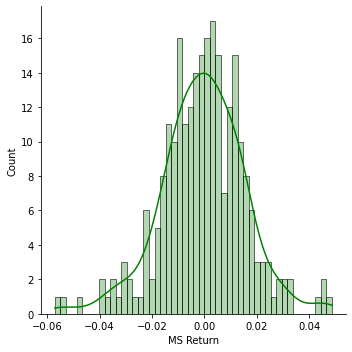

In [26]:
sns.displot(returns['MS Return'].loc['2015-01-01':'2015-12-31'],
            color='green',
            alpha=0.3,
            kde=True,
            bins=50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

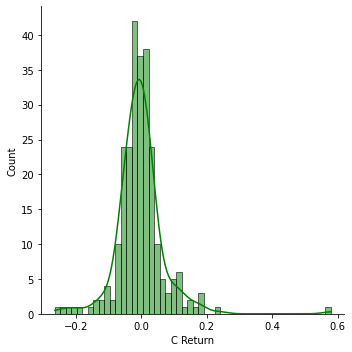

In [31]:
sns.displot(returns['C Return'].loc['2008-01-01':'2008-12-31'],
            kde=True,
            color='green',
            bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

<AxesSubplot:xlabel='Date'>

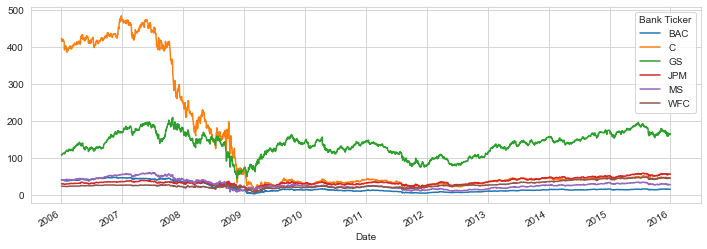

In [39]:
bank_stocks.xs('Close',axis=1,level='Stock Info',drop_level=True).plot(figsize=(12,4))

In [41]:
# bank_stocks.xs('Close',axis=1,level='Stock Info',drop_level=True).iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<Figure size 864x288 with 0 Axes>

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

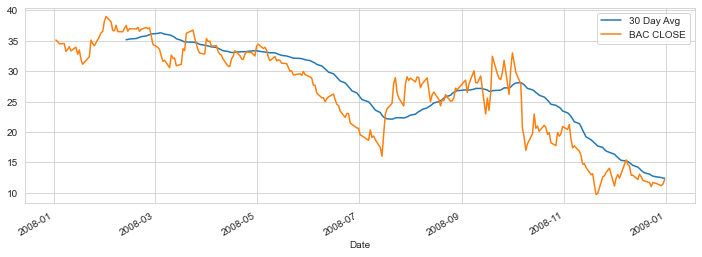

In [47]:
plt.figure(figsize=(12,4))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].rolling(30).mean().plot(label='30 Day Avg')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC CLOSE')
plt.legend()

<Figure size 864x288 with 0 Axes>

<AxesSubplot:xlabel='Date'>

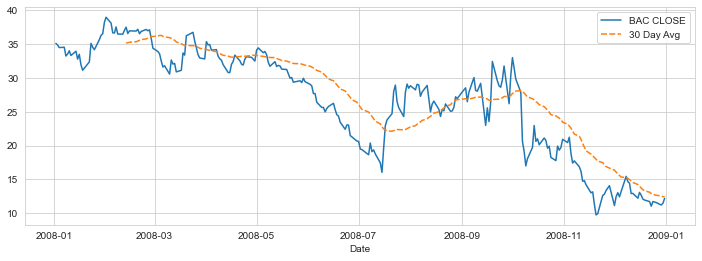

In [145]:
data = pd.merge(bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'],
                bank_stocks['BAC']['Close'].loc['2008-01-01':'2008-12-31'].rolling(30).mean(),
                left_index=True,
                right_index=True)

data.rename(columns={'Close_x':'BAC CLOSE', 'Close_y':'30 Day Avg'},inplace=True)

plt.figure(figsize=(12,4))
sns.lineplot(data=data)

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

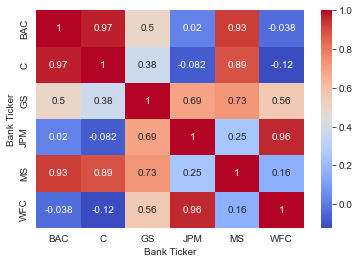

In [51]:
sns.heatmap(bank_stocks.xs('Close',axis=1,level='Stock Info').corr(),annot=True,cmap='coolwarm')

** Optional: Use seaborn's clustermap to cluster the correlations together:**

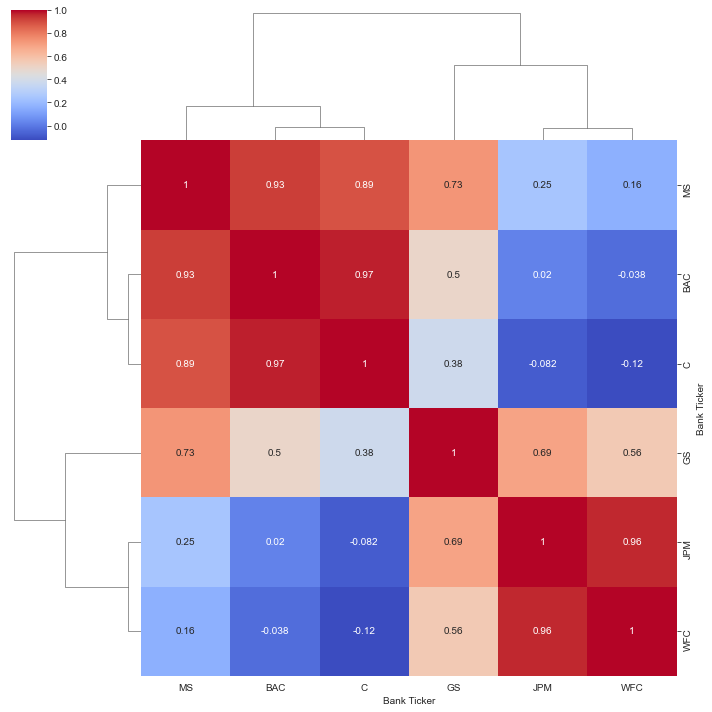

In [156]:
sns.clustermap(bank_stocks.xs('Close',axis=1,level=1,drop_level=True).corr(),cmap='coolwarm',annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

In [157]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf

In [158]:
init_notebook_mode(connected=True)
cf.go_offline()

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [59]:
BAC['Open High Low Close'.split()].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

/var/folders/db/5j1_g_kx55n7j7zg0wd44qnw0000gn/T/ipykernel_1693/2436755459.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [60]:
MS['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='sma',periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [62]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

/var/folders/db/5j1_g_kx55n7j7zg0wd44qnw0000gn/T/ipykernel_1693/3850420300.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.